This notebook is used to analyse the model runs for no discharge and with discharge scenarios and to plot the original streamflow data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the weiherbach and schwarzbach data
#With discharge
file_path = r'y_obs.csv'
y_obs = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_obs.set_index(y_obs.columns[0],inplace=True)
file_path = r'y_sim.csv'
y_sim = pd.read_csv(file_path, parse_dates=[0])
y_sim.set_index(y_sim.columns[0],inplace=True)

In [2]:
# Example Usage
catchment = 'camelslx_054' # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\camels_lux\LUX\LUX_forcings\timeseries\csv\{catchment}.csv"
streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)

In [3]:
# Create a list to store the annual maximum dates and streamflows
annual_max_list = []
data = streamflow_df
# Resample by year
annual_groups = data['streamflow'].resample('Y')

for year, group in annual_groups:
    if not group.empty:
        max_date = group.idxmax()
        max_value = group.max()
        annual_max_list.append({'date': max_date, 'streamflow': max_value})

# Convert the list to a DataFrame
annual_max_dates = pd.DataFrame(annual_max_list)

print(annual_max_dates)

         date  streamflow
0         NaT         NaN
1         NaT         NaN
2         NaT         NaN
3         NaT         NaN
4  2004-12-25        6.81
5  2005-02-13       20.65
6  2006-03-09       23.49
7  2007-01-18       44.35
8  2008-02-06       32.51
9  2009-01-23       41.00
10 2010-02-28       27.41
11 2011-01-07       43.13
12 2012-07-14       29.90
13 2013-11-04       30.60
14 2014-12-13       28.44
15 2015-01-15       20.76
16 2016-02-08       20.25
17 2017-12-11       31.99
18 2018-12-09       29.36
19 2019-02-10       46.76
20 2020-12-23       43.28
21 2021-07-15       47.54
22        NaT         NaN


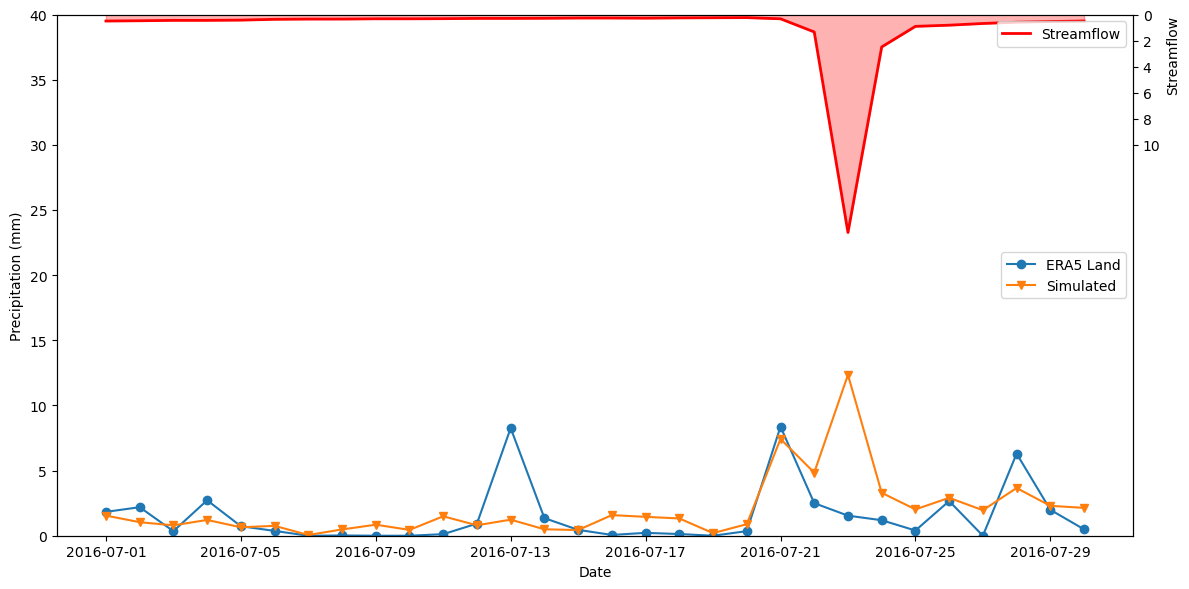

In [10]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    
    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', marker='v')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation (mm)')
    ax1.legend(loc='center right')
    ax1.set_ylim([0, 40])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow', loc='top')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0, 40])
    ax2.set_yticks([0,2,4,6,8,10])
    ax2.invert_yaxis()

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

catchment = 'camelslx_054' # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\camels_lux\LUX\LUX_forcings\timeseries\csv\{catchment}.csv"
start_date = '2016-07-01'
end_date = '2016-07-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, catchment, start_date, end_date)

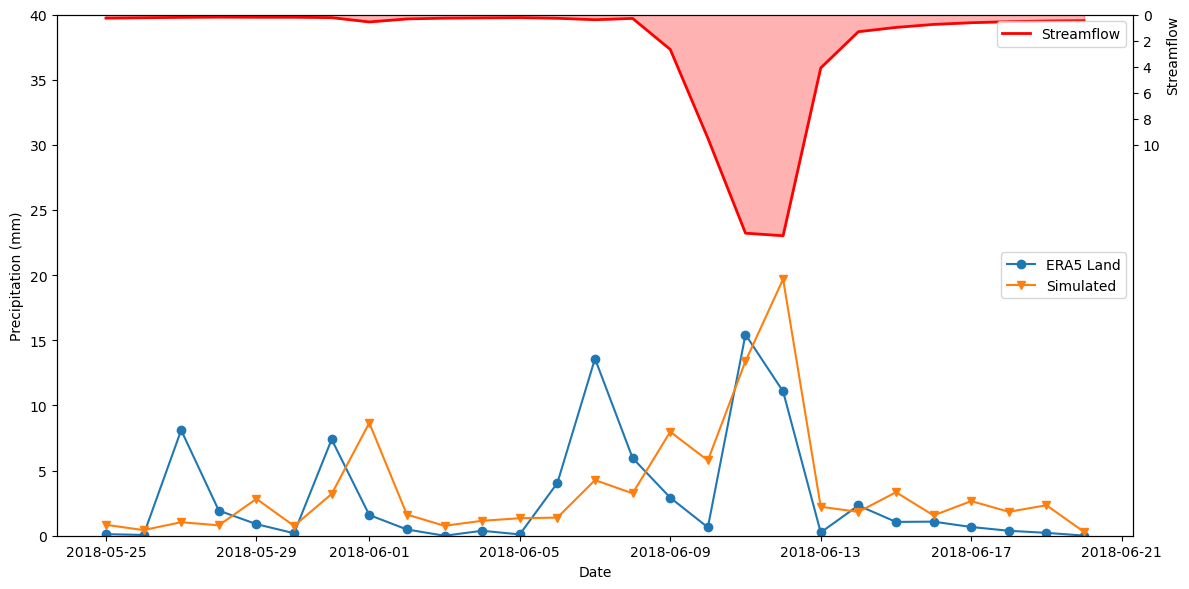

In [7]:
catchment = 'camelslx_054' # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\camels_lux\LUX\LUX_forcings\timeseries\csv\{catchment}.csv"
start_date = '2018-05-25'
end_date = '2018-06-20'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, catchment, start_date, end_date)

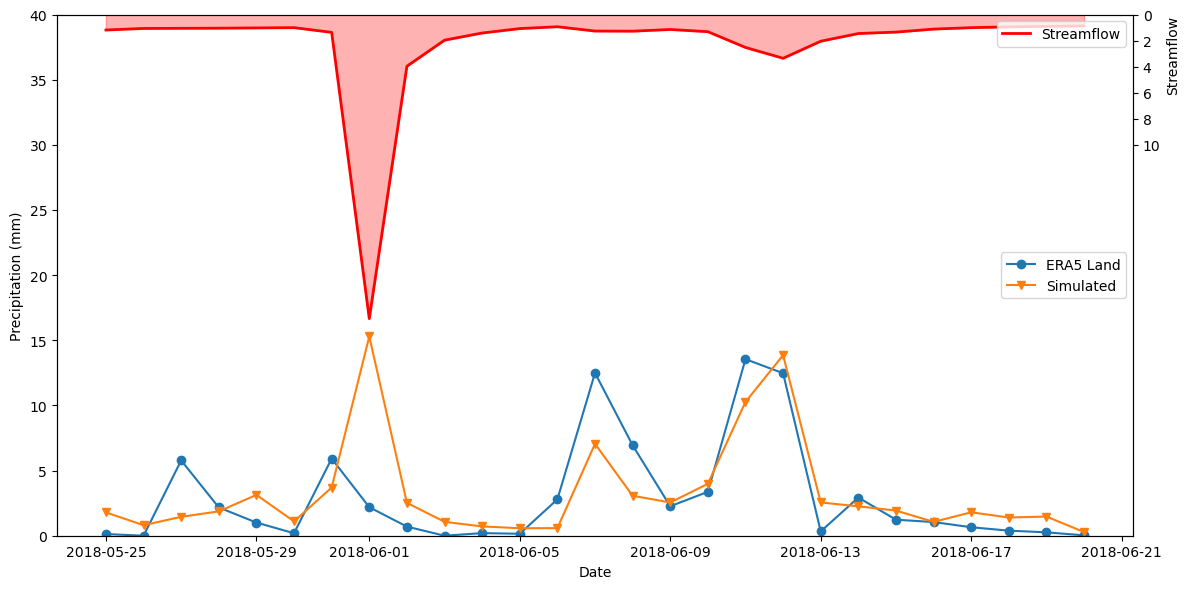

In [11]:
catchment = 'camelslx_055' # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\camels_lux\LUX\LUX_forcings\timeseries\csv\{catchment}.csv"
start_date = '2018-05-25'
end_date = '2018-06-20'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, catchment, start_date, end_date)

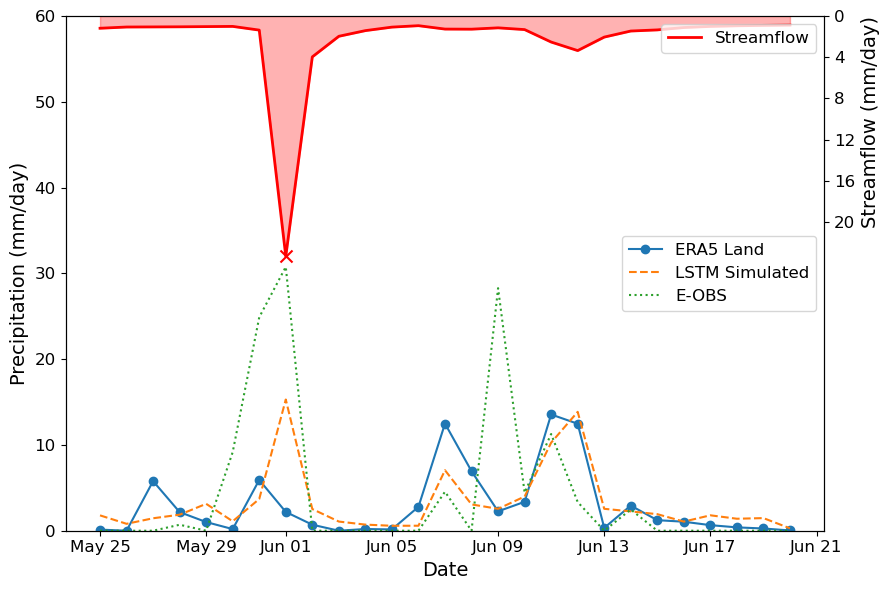

In [5]:
import matplotlib.dates as mdates
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    
    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    eobs_df = pd.read_csv(csv_path1, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    eobs_df_filtered = eobs_df.loc[start_date:end_date, 'value']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='LSTM Simulated', linestyle='--')
    ax1.plot(eobs_df_filtered.index, eobs_df_filtered, label='E-OBS', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    ax1.legend(loc='center right', fontsize=12)
    #ax1.set_title(f'Catchment: Ernz (camelslx_55) from {start_date} to {end_date}')
    ax1.tick_params(axis='both', labelsize=12)
    ax1.set_ylim([0, 60])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2018-06-01'), streamflow_filtered.loc['2018-06-01'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 50])
    ax2.set_yticks([0,4,8,12,16,20])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()

    # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.savefig('hydrograph.jpeg',dpi=1200)
    plt.show()

catchment = 'camelslx_055' # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\camels_lux\LUX\LUX_forcings\timeseries\csv\{catchment}.csv"
start_date = '2018-05-25'
end_date = '2018-06-20'
csv_path1 = rf"precip_eobs_camelslx_55.csv"

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)

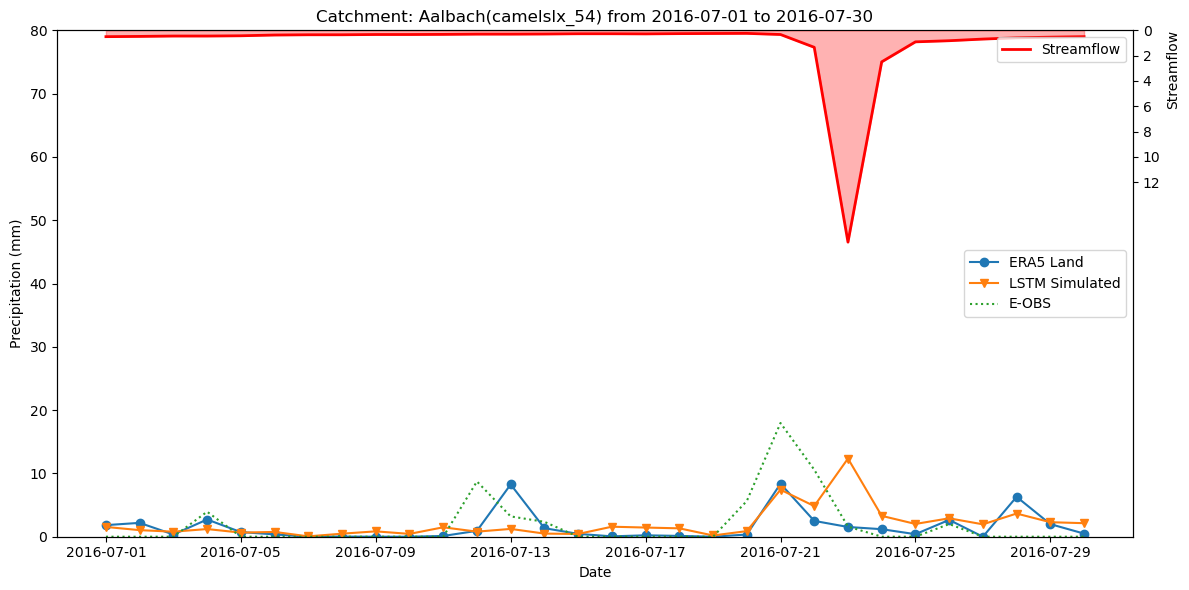

In [16]:
catchment = 'camelslx_054' # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\camels_lux\LUX\LUX_forcings\timeseries\csv\{catchment}.csv"
start_date = '2016-07-01'
end_date = '2016-07-30'
csv_path1 = rf"precip_eobs_camelslx_54.csv"

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)